In [8]:
# Home work 1.1: Check the Central limit Theorem by
# building two-modal distribution (like above) generating many points,
# taking samples (e.g. 100 values) and computing mean value,
# plotting distribution with mean values from many samples

In [9]:
from numpy import ndarray
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns                           # Seaborn is a library for making statistical graphics in Python
from sklearn.neighbors import KernelDensity

means = []
for x in range(0, 100):
    n = 500000
    dist_frac = 0.1
    x1 = np.random.normal(-5,2,int(n*dist_frac))      # 1st distribution with mu=-5, sigma=2
    x2 = np.random.normal(5,3,int(n*(1-dist_frac)))   # 2nd distribution with mu= 5, sigma=3
    x = np.concatenate((x1,x2))
    mean = np.mean(x)
    means.append(mean)

means = np.array(means)
eval_points = np.linspace(np.min(means), np.max(means))

kde_sk = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde_sk.fit(means.reshape([-1,1]))
y_sk = np.exp(kde_sk.score_samples(eval_points.reshape(-1,1)))

kde_sp = gaussian_kde(means, bw_method=1.0)
y_sp = kde_sp.pdf(eval_points)

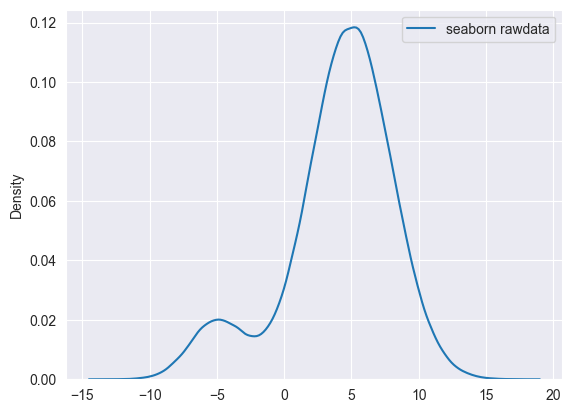

In [10]:
sns.kdeplot(x)
plt.legend(['seaborn rawdata'])

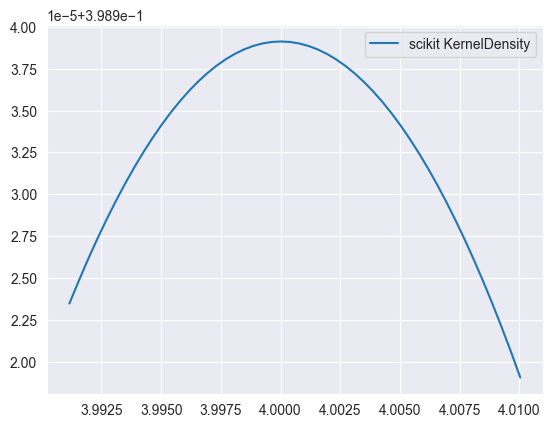

In [11]:
plt.plot(eval_points, y_sk)
plt.legend(['scikit KernelDensity'])

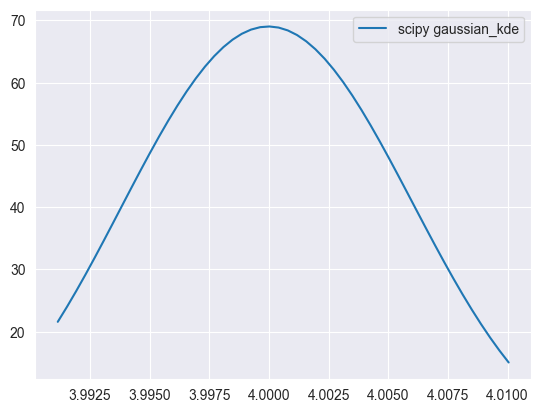

In [12]:
plt.plot(eval_points, y_sp)
plt.legend(['scipy gaussian_kde'])